In [13]:
"""
    Init
"""
import tensorflow as tf
import numpy as np

rand = np.random

learning_rate = .01
training_steps = 1000
display_step = 50
# Train data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Label
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

W = tf.Variable(rand.randn(), name="weight")
b = tf.Variable(rand.randn(), name="bias")

In [14]:
"""
    Function
"""
# Regression Wx + b
def linear(x):
    return W * x + b


def mean_square_error(pred):
    return tf.reduce_mean(tf.square(Y - pred))


optimizer = tf.optimizers.SGD(learning_rate)
def run_optimizer():

    # Wrap computation inside gradient tape to automation differentiation
    with tf.GradientTape() as g:
        pred = linear(X)
        loss = mean_square_error(pred)

    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))


In [15]:
for step in range(training_steps):
    run_optimizer()

    if step % display_step == 0:
        pred = linear(X)
        loss = mean_square_error(pred)
        print("step: %d, loss: %.2f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))


step: 0, loss: 0.25, W: 0.198302, b: 1.416932
step: 50, loss: 0.19, W: 0.175008, b: 1.342049
step: 100, loss: 0.18, W: 0.183777, b: 1.279882
step: 150, loss: 0.18, W: 0.191543, b: 1.224829
step: 200, loss: 0.17, W: 0.198419, b: 1.176076
step: 250, loss: 0.17, W: 0.204509, b: 1.132903
step: 300, loss: 0.16, W: 0.209902, b: 1.094670
step: 350, loss: 0.16, W: 0.214678, b: 1.060812
step: 400, loss: 0.16, W: 0.218907, b: 1.030828
step: 450, loss: 0.16, W: 0.222652, b: 1.004276
step: 500, loss: 0.16, W: 0.225969, b: 0.980762
step: 550, loss: 0.16, W: 0.228906, b: 0.959940
step: 600, loss: 0.16, W: 0.231507, b: 0.941500
step: 650, loss: 0.16, W: 0.233810, b: 0.925170
step: 700, loss: 0.16, W: 0.235850, b: 0.910709
step: 750, loss: 0.16, W: 0.237656, b: 0.897902
step: 800, loss: 0.15, W: 0.239256, b: 0.886562
step: 850, loss: 0.15, W: 0.240673, b: 0.876519
step: 900, loss: 0.15, W: 0.241927, b: 0.867625
step: 950, loss: 0.15, W: 0.243038, b: 0.859749


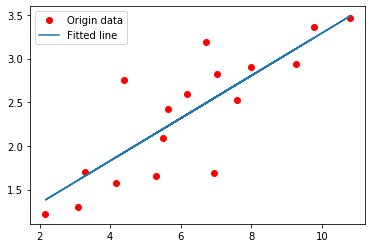

In [16]:

from matplotlib import pyplot as plt
plt.plot(X, Y, "ro", label="Origin data")
plt.plot(X, np.array(W * X  + b), label="Fitted line")
plt.legend()
plt.show()